## Imports

In [1]:
import pandas as pd 
import requests
import seaborn as sns
from datetime import datetime

from helper import clean_data
from helper import RMSE
from helper import split_data

from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

%pylab inline
%config InlineBackend.figure_format = 'svg'
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


## Data loading & cleaning

In [2]:
weekly_pct, vix_close = clean_data() #clean_data is a helper function that returns the data weekly and normalized

In [5]:
df_len = weekly_pct.shape[0]
train_vix = weekly_pct.iloc[:df_len-52*2,0].values
test = weekly_pct.iloc[df_len-52*2:,0].values


In [8]:
train = train_vix #only using vix data in ARIMA models

In [11]:
def window_refitting_with_test_data(df,p,q):
    preds = []
    df = list(df)

    for i in test:
        model = ARIMA(df, order=(p,0,q)).fit()
        pred = model.forecast()[0][0]
        preds.append(pred)
        df.append(i)

    plt.plot(test)
    plt.plot(preds)
    rmse = RMSE(test,np.array(preds))
    print(rmse)
    
    return rmse,test,preds


0.03794304455440151


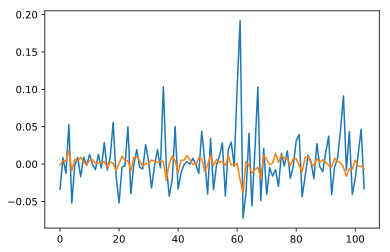

In [14]:
ans = window_refitting_with_test_data(train,8,2)

In [ ]:
#Code for saving graph for presentation
ans = test_model(train,1,0)
df_dict = {'validation':ans[1],'predictions':ans[2]}
graph_df = pd.DataFrame.from_dict(df_dict)
x = weekly_pct.iloc[df_len-52*4:df_len-52*2,1].index
a = sns.lineplot(x=x, y='validation',data=graph_df, ci=None)
a = sns.lineplot(x=x, y='predictions',data=graph_df, ci=None).set_title('VIX Validation vs. Prediction')
plt.xlabel('Date')
plt.ylabel('VIX percent change')
plt.xticks(rotation=45)

figure = a.get_figure()
figure.savefig('results.svg',  bbox_inches='tight')